<a href="https://colab.research.google.com/github/krldlamini/edm_brazildengue/blob/main/Data_Analysis/notebooks/Climate_Data_Separate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code to read in climate data downloaded from INMET

This file analyses input climate data to determine the municipalities with the most missing records

Read in packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inmet_data = pd.read_csv('drive/MyDrive/Dengue_BR/Input_Documents/01_inmet.csv', sep=",",quotechar='"',
                   parse_dates=["data"],na_values=[''])

In [ ]:
# columns we will not use in this analysis
cols_to_drop = ['pressao_atmosferica_ao_nivel_da_estacao_horaria','pressao_atmosferica_maxna_hora_ant','pressao_atmosferica_min_na_hora_ant','radiacao_global','temperatura_do_ar_bulbo_seco_horaria','temperatura_do_ponto_de_orvalho',
               'temperatura_orvalho_max_na_hora_ant','temperatura_orvalho_min_na_hora_ant','umidade_relativa_do_ar_horaria',
                'vento_direcao_horaria','vento_rajada_maxima','vento_velocidade_horaria']
# dropping columns
inmet_data = inmet_data.drop(columns = cols_to_drop)
# how to replace the data that interests us
dic_replace = {'precipitacao_total_horario':'sum',
               'temperatura_maxima_na_hora_ant':'mean',
               'temperatura_minima_na_hora_ant':'mean',
               'umidade_rel_max_na_hora_ant': 'mean',
               'umidade_rel_min_na_hora_ant': 'mean',
              }

In [ ]:
# a general way to extract all climatic data for each week and station of interest
# code for stations of interest
cod_stations = inmet_data['codigo'].unique()
# for each station
for i in cod_stations:
    data_tmp = inmet_data[inmet_data['codigo'] == i].copy() # filter station
    data_tmp.drop(columns = ['codigo']) # dropping codigo from dataframe
    # extracting data for each epidemiological week
    data_tmp['data'] = pd.to_datetime(data_tmp['data']) - pd.to_timedelta(7, unit='d')
    data_tmp = data_tmp.groupby([pd.Grouper(key='data', freq='W')]).aggregate(dic_replace)
    # reset index
    data_tmp = data_tmp.reset_index()
    # now filtering
    data_tmp = data_tmp[data_tmp['data'] >= '2007-01-01']
    data_tmp = data_tmp[data_tmp['data'] < '2022-01-01']
    data_tmp['data'] = pd.to_datetime(data_tmp['data']).dt.date
    # save csv
    file_path_i = 'drive/MyDrive/Dengue_BR/Output_Documents/Weather_Stations/'+ str(i)+ '_climate.csv'
    data_tmp.to_csv(file_path_i, index = False)

In [ ]:
one_station = pd.read_csv('drive/MyDrive/Dengue_BR/Output_Documents/Weather_Stations/A702_climate.csv')

## Preview of the data

In [ ]:
one_station

,data,precipitacao_total_horario,temperatura_maxima_na_hora_ant,temperatura_minima_na_hora_ant,umidade_rel_max_na_hora_ant,umidade_rel_min_na_hora_ant
0,2007-01-07,38.4,25.877976,24.748214,84.369048,78.785714
1,2007-01-14,81.0,25.202976,24.184524,83.946429,78.738095
2,2007-01-21,104.8,25.194643,23.922024,85.767857,79.702381
3,2007-01-28,88.0,24.858333,23.639881,87.541667,82.178571
4,2007-02-04,76.2,25.419048,24.242857,85.613095,80.142857
...,...,...,...,...,...,...
777,2021-11-28,76.6,27.795833,27.123214,75.958333,73.613095
778,2021-12-05,6.2,27.786310,27.075000,65.369048,62.053571
779,2021-12-12,48.8,27.229167,26.628571,80.720238,79.089286
780,2021-12-19,14.6,27.776190,26.977381,71.619048,69.148810


# Counts the number of nans

In [ ]:
df = one_station.describe()

In [ ]:
df

,precipitacao_total_horario,temperatura_maxima_na_hora_ant,temperatura_minima_na_hora_ant,umidade_rel_max_na_hora_ant,umidade_rel_min_na_hora_ant
count,782.000000,760.000000,760.000000,760.000000,760.000000
mean,26.673657,24.646104,23.251031,68.128348,62.380315
std,33.091738,2.649212,2.573759,12.643506,12.647938
min,0.000000,13.027381,12.191667,25.190476,22.208333
25%,0.200000,23.356614,21.902854,60.474702,54.369048
50%,13.600000,25.061668,23.785417,70.895773,64.776786
75%,42.200000,26.347024,24.907143,77.690476,71.787202
max,170.000000,32.835135,31.340541,89.969880,87.017857


In [ ]:
df['temperatura_maxima_na_hora_ant']['count']

760.0

Counting Number of Zeroes for Rainfall Records

In [ ]:
zero_counts = (one_station['precipitacao_total_horario'] == 0).sum()

In [ ]:
zero_counts

185

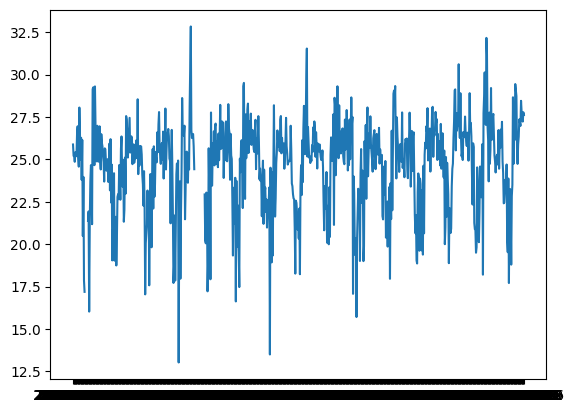

In [ ]:
plt.plot(one_station['data'],one_station['temperatura_maxima_na_hora_ant'])

## Starting date

In [ ]:
min(one_station['data'])

'2007-01-07'

## End date

In [ ]:
max(one_station['data'])

'2021-12-26'

In [ ]:
test = len(one_station)

In [ ]:
test

782

## Loop through files

In [ ]:
ids_climate = ["A001","A002", "A009", "A101", "A104", "A301",
                 "A303", "A312","A320", "A507", "A521",
                 "A636", "A652","A701", "A702", "A901"]

In [ ]:
len(ids_climate)

16

# Function to extract important start and end dates, no. of records, and no. of NaNs given a certain station ID

In [ ]:
def process_climate_stations(id_climate):
  file_station = id_climate+'_climate.csv'
  df_station = pd.read_csv('drive/MyDrive/Dengue_BR/Output_Documents/Weather_Stations/' + file_station) #open csv file for given station id
  # Get start and end dates
  start_date = min(df_station['data'])
  end_date = max(df_station['data'])

  # Get the number of records for each of the metrics
  df_summary = df_station.describe()
  # Rainfall
  precip_records = df_summary['precipitacao_total_horario']['count']
  zero_counts = (df_station['precipitacao_total_horario'] == 0).sum() # number of zeroes of Rainfall
  # Maximum temperature
  max_temp_records = df_summary['temperatura_maxima_na_hora_ant']['count']
  max_temp_nans = len(df_station) - max_temp_records
  # Minimum temperature
  min_temp_records = df_summary['temperatura_minima_na_hora_ant']['count']
  min_temp_nans = len(df_station) - min_temp_records
  # Maximum humidity
  max_humid_records = df_summary['umidade_rel_max_na_hora_ant']['count']
  max_humid_nans = len(df_station) - max_humid_records
  # Minimum humidity
  min_humid_records = df_summary['umidade_rel_min_na_hora_ant']['count']
  min_humid_nans = len(df_station) - min_humid_records

  station_nans = [id_climate, start_date, end_date, zero_counts, max_temp_nans, min_temp_nans, max_humid_nans, min_humid_nans]

  return station_nans

In [ ]:
process_climate_stations('A001')

['A001', '2007-01-07', '2021-12-26', 283, 0.0, 0.0, 0.0, 0.0]

In [ ]:
# Create empty dataframe with labels
pd_nans = pd.DataFrame([{'station_id':'',
                                'start_date':'',
                                'end_date':'',
                                'precipitation_zeroes': '',
                                'max_temp_nans': '',
                                'min_temp_nans': '',
                                'max_humid_nans': '',
                                'min_humid_nans': '',}])
counter = 0
for id in ids_climate:
    pd_nans.loc[counter] = process_climate_stations(id)
    counter = counter + 1

In [ ]:
#### dataframe
# id station    # start date    # end date   # numbers of Nans for max temp/min temp/humidity max/humidity min/precipation
#A701             2007-01-16      xxxxxxxx        2
pd_nans = pd_nans.reset_index(drop=True)

In [ ]:
pd_nans

# Sort by Start Date

In [ ]:
start_date_sort = pd_nans.sort_values('start_date').reset_index(drop=True)
start_date_sort

# Sort by Precipitation

In [ ]:
precip_sort = pd_nans.sort_values('precipitation_zeroes').reset_index(drop=True)
precip_sort

# Sort by Temperature

In [ ]:
max_temp_sort = pd_nans.sort_values('max_temp_nans').reset_index(drop=True)
max_temp_sort

# Sort by Humidity

In [ ]:
max_humid_sort = pd_nans.sort_values('max_humid_nans').reset_index(drop=True)
max_humid_sort

In [ ]:
remove_ids = ['A104', 'A303', 'A320', 'A101', 'A636']
final_stations = pd_nans.drop(pd_nans[pd_nans['station_id'].isin(remove_ids)].index)
final_stations = final_stations.reset_index(drop=True)

In [ ]:
final_stations